# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,186-9-114-B--Spectrum--051--Spec.Data 1,103.249639,0.017555,1286.087951,0.016047,145.571254,1286.087951,228.003945,0.604168,2.793357,...,1.132196,0.090278,0.008301,1.113150,1.113475,0.109029,0.003696,PseudoVoigtModel,PseudoVoigtModel,No
1,186-9-114-C--Spectrum--055--Spec.Data 1_CRR_Di...,103.291788,0.048445,1286.016789,0.045516,84.038174,1286.016789,155.328267,0.588334,4.314198,...,1.440000,0.284149,0.014002,1.011080,1.010504,0.009983,0.005419,PseudoVoigtModel,PseudoVoigtModel,No
2,186-9-115-A--Spectrum--062--Spec.Data 1_CRR_Di...,103.450514,0.024469,1285.588319,0.022694,624.555914,1285.588319,1182.391597,0.644599,15.826024,...,1.098592,0.031702,0.002064,1.023324,1.073118,0.027612,0.001050,PseudoVoigtModel,PseudoVoigtModel,No
3,186-9-115-A--Spectrum--063--Spec.Data 1_CRR_Di...,103.474917,0.050067,1285.587169,0.045990,465.626171,1285.587169,762.802327,0.625139,22.520732,...,1.267490,0.003656,0.002685,1.028302,1.040089,0.033632,0.001559,PseudoVoigtModel,PseudoVoigtModel,No
4,186-9-115-A--Spectrum--064--Spec.Data 1_CRR_Di...,103.465297,0.032229,1285.577324,0.030072,416.524075,1285.577324,877.089357,0.761072,14.252249,...,1.146302,0.064015,0.003654,1.026786,1.107456,0.031339,0.001431,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'004 FG04-A1-1-start--Spectrum--004--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 43/43 [00:07<00:00,  5.96it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-1-start--Spectrum--004--Information.txt,"May 29, 2024\n",May,29.0,6.026,45.0,5.0,50.0,"['0h', '3m', '46s']",11:07:21 AM\n,40041.0,1324.964
1,FG04-A1-2-start--Spectrum--005--Information.txt,"May 29, 2024\n",May,29.0,6.073,45.0,5.0,50.0,"['0h', '3m', '46s']",11:12:19 AM\n,40339.0,1324.964
2,FG04-A1-4-start--Spectrum--006--Information.txt,"May 29, 2024\n",May,29.0,6.059,45.0,5.0,50.0,"['0h', '3m', '46s']",11:17:01 AM\n,40621.0,1324.964
3,FG04-A1-13-start--Spectrum--013--Information.txt,"May 29, 2024\n",May,29.0,6.042,60.0,5.0,50.0,"['0h', '5m', '2s']",11:33:39 AM\n,41619.0,1324.964
4,FG04-A1-14-start--Spectrum--015--Information.txt,"May 29, 2024\n",May,29.0,6.021,60.0,4.0,50.0,"['0h', '4m', '1s']",11:46:23 AM\n,42383.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-1-start--Spectrum--004--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-1-start--Spectrum--004', 'FG04-A1-2-start--Spectrum--005',
       'FG04-A1-4-start--Spectrum--006',
       'FG04-A1-13-start--Spectrum--013',
       'FG04-A1-14-start--Spectrum--015',
       'FG04-A1-14-start--Spectrum--016',
       'FG04-A1-14-start--Spectrum--017',
       'FG04-A1-15-start--Spectrum--020',
       'FG04-A1-16-start--Spectrum--022',
       'FG04-A1-16-start--Spectrum--023',
       'FG04-A1-16-start--Spectrum--024', 'FG19-101-A--Spectrum--032',
       '186-9-114-A--Spectrum--045', '186-9-114-A--Spectrum--048',
       '186-9-114-B--Spectrum--051', '186-9-114-C--Spectrum--055',
       '186-9-115-A--Spectrum--062', '186-9-115-A--Spectrum--063',
       '186-9-115-A--Spectrum--064', '186-9-116-A--Spectrum--079',
       '186-9-116-A--Spectrum--080', '186-9-117-A--Spectrum--087',
       '186-9-117-A--Spectrum--088', '186-9-117-A--Spectrum--089',
       '186-9-117-B--Spectrum--090', '186-9-117-C--Spectrum--093',
       '186-9-118-A--Spectrum--114', '186-9-118-A-

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
186-9-114-B--Spectrum--051--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['186-9-114-B--Spectrum--051', '186-9-114-C--Spectrum--055',
       '186-9-115-A--Spectrum--062', '186-9-115-A--Spectrum--063',
       '186-9-115-A--Spectrum--064', '186-9-117-A--Spectrum--089',
       '186-9-117-C--Spectrum--093', '186-9-118-A--Spectrum--114',
       '186-9-118-A--Spectrum--115', '186-9-118-A--Spectrum--116',
       '186-9-118-A--Spectrum--117', '186-9-118-A-average',
       '186-9-119-A--Spectrum--127', '186-9-119-B--Spectrum--129',
       '186-9-102-C--Spectrum--160', '186-9-124-A--Spectrum--169',
       '186-9-124-B--Spectrum--173', '186-9-114-A--Spectrum--045',
       '186-9-114-A--Spectrum--048', '186-9-116-A--Spectrum--079',
       '186-9-116-A--Spectrum--080', '186-9-117-A--Spectrum--087',
       '186-9-117-A--Spectrum--088', '186-9-117-B--Spectrum--090',
       '186-9-101-A--Spectrum--142', '186-9-102-A--Spectrum--155',
       '186-9-102-B--Spectrum--157', 'FG04-A1-1-start--Spectrum--004',
       'FG04-A1-2-start--Spectrum--005', 'FG04-A1-4-start--Spectr

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,186-9-114-B--Spectrum--051,103.249639,0.017555,1286.087951,0.016047,145.571254,1286.087951,228.003945,0.604168,2.793357,...,May,29.0,6.030,60.0,4.0,100.0,"['0h', '4m', '1s']",1:02:14 PM\n,46934.0,1324.964
1,186-9-114-C--Spectrum--055,103.291788,0.048445,1286.016789,0.045516,84.038174,1286.016789,155.328267,0.588334,4.314198,...,May,29.0,6.045,60.0,4.0,100.0,"['0h', '4m', '1s']",1:10:41 PM\n,47441.0,1324.964
2,186-9-115-A--Spectrum--062,103.450514,0.024469,1285.588319,0.022694,624.555914,1285.588319,1182.391597,0.644599,15.826024,...,May,29.0,6.059,60.0,4.0,50.0,"['0h', '4m', '1s']",1:24:36 PM\n,48276.0,1324.964
3,186-9-115-A--Spectrum--063,103.474917,0.050067,1285.587169,0.045990,465.626171,1285.587169,762.802327,0.625139,22.520732,...,May,29.0,6.063,60.0,4.0,50.0,"['0h', '4m', '1s']",1:28:51 PM\n,48531.0,1324.964
4,186-9-115-A--Spectrum--064,103.465297,0.032229,1285.577324,0.030072,416.524075,1285.577324,877.089357,0.761072,14.252249,...,May,29.0,6.065,60.0,4.0,50.0,"['0h', '4m', '1s']",1:33:17 PM\n,48797.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.915425651944424e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-9-101-A--Spectrum--142,0.151517,0.004546,0.002327,0.003905,103.132643,0.005873,0.000517,0.005862,6.085,...,NaN,NaN,NaN,NaN,NaN,NaN,61098.0,0.997937,0.997932,0.997942
1,186-9-102-A--Spectrum--155,0.201284,0.003936,0.003145,0.002367,103.246403,0.007681,0.000524,0.007679,6.083,...,NaN,NaN,NaN,NaN,NaN,NaN,62410.0,0.997935,0.997930,0.997940
2,186-9-102-B--Spectrum--157,0.073289,0.004263,0.001919,0.003806,102.935216,0.004842,0.000524,0.004824,6.082,...,NaN,NaN,NaN,NaN,NaN,NaN,62691.0,0.997935,0.997930,0.997940
3,186-9-102-C--Spectrum--160,0.064195,0.006775,0.005599,0.003815,102.912266,0.014131,0.000526,0.014150,6.081,...,NaN,NaN,NaN,NaN,NaN,NaN,63050.0,0.997934,0.997929,0.997939
4,186-9-114-A--Spectrum--045,0.157731,0.004879,0.002897,0.003925,103.148325,0.007310,0.000494,0.007309,6.007,...,NaN,NaN,NaN,NaN,NaN,NaN,46265.0,0.997982,0.997977,0.997987


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

4.915425651944424e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,186-9-101-A--Spectrum--142,0.151517,0.004546,0.002327,0.003905,103.132643,0.005873,0.000517,0.005862,6.085,...,NaN,NaN,NaN,NaN,NaN,NaN,61098.0,0.997937,0.997932,0.997942
1,186-9-102-A--Spectrum--155,0.201284,0.003936,0.003145,0.002367,103.246403,0.007681,0.000524,0.007679,6.083,...,NaN,NaN,NaN,NaN,NaN,NaN,62410.0,0.997935,0.997930,0.997940
2,186-9-102-B--Spectrum--157,0.073289,0.004263,0.001919,0.003806,102.935216,0.004842,0.000524,0.004824,6.082,...,NaN,NaN,NaN,NaN,NaN,NaN,62691.0,0.997935,0.997930,0.997940
3,186-9-102-C--Spectrum--160,0.064195,0.006775,0.005599,0.003815,102.912266,0.014131,0.000526,0.014150,6.081,...,NaN,NaN,NaN,NaN,NaN,NaN,63050.0,0.997934,0.997929,0.997939
4,186-9-114-A--Spectrum--045,0.157731,0.004879,0.002897,0.003925,103.148325,0.007310,0.000494,0.007309,6.007,...,NaN,NaN,NaN,NaN,NaN,NaN,46265.0,0.997982,0.997977,0.997987


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_May 29, 2024_fitted_2024-07-08.xlsx


## This helps visualize the errors on each spectra 

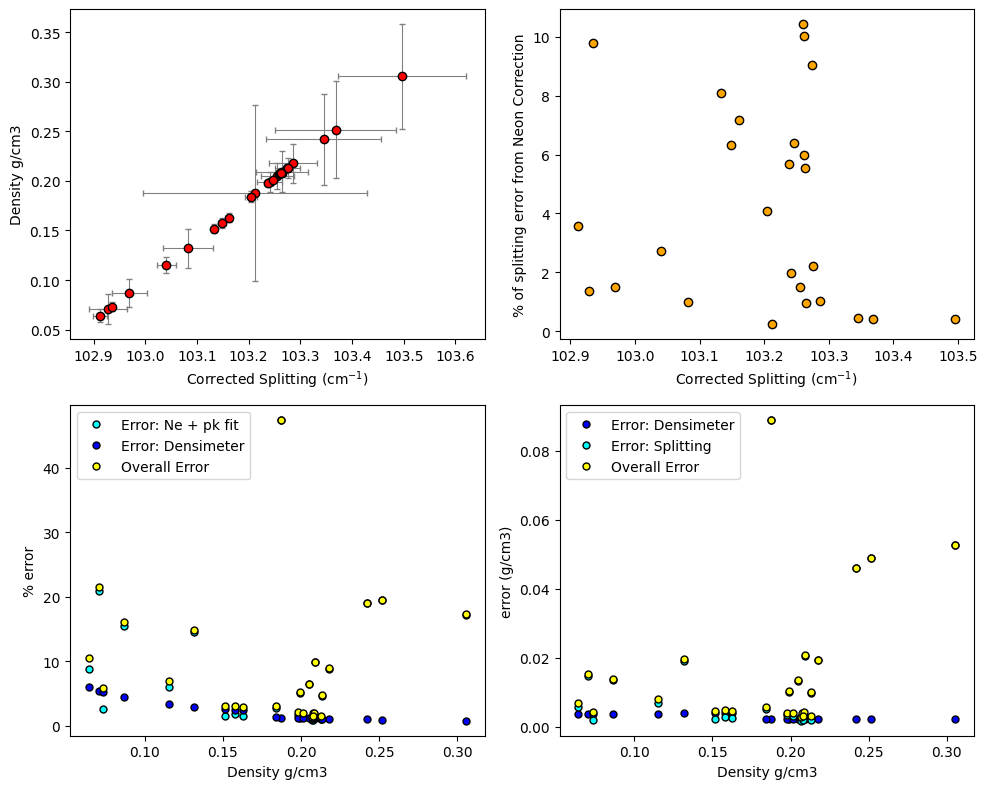

In [21]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

In [23]:
df[df['σ Density g/cm3']>0.04]

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
18,186-9-118-A--Spectrum--114,0.251672,0.048994,0.048937,0.002358,103.368425,0.117420,0.000507,0.117661,6.085,...,NaN,NaN,NaN,NaN,NaN,NaN,58538.0,0.997942,0.997937,0.997947
19,186-9-118-A--Spectrum--115,0.187330,0.088789,0.088758,0.002370,103.212245,0.217451,0.000506,0.217899,6.085,...,NaN,NaN,NaN,NaN,NaN,NaN,58607.0,0.997942,0.997937,0.997946
20,186-9-118-A--Spectrum--116,0.241955,0.046026,0.045966,0.002359,103.345063,0.110682,0.000507,0.110909,6.084,...,NaN,NaN,NaN,NaN,NaN,NaN,58680.0,0.997941,0.997936,0.997946
21,186-9-118-A--Spectrum--117,0.305340,0.052725,0.052672,0.002352,103.495958,0.123816,0.000508,0.124071,6.087,...,NaN,NaN,NaN,NaN,NaN,NaN,58770.0,0.997941,0.997936,0.997946


## lets look at standards


Text(0, 0.5, 'Density g/cm3')

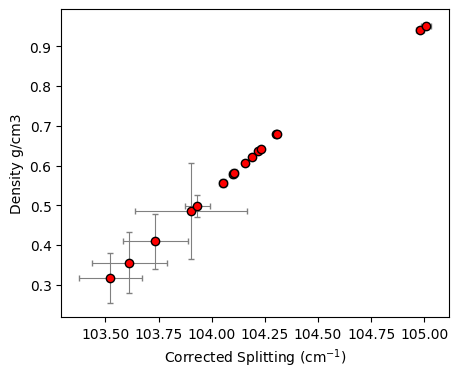

In [24]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [28]:
df[~(df['σ Density g/cm3']>0.04)].to_clipboard(excel=True,index=False)



In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

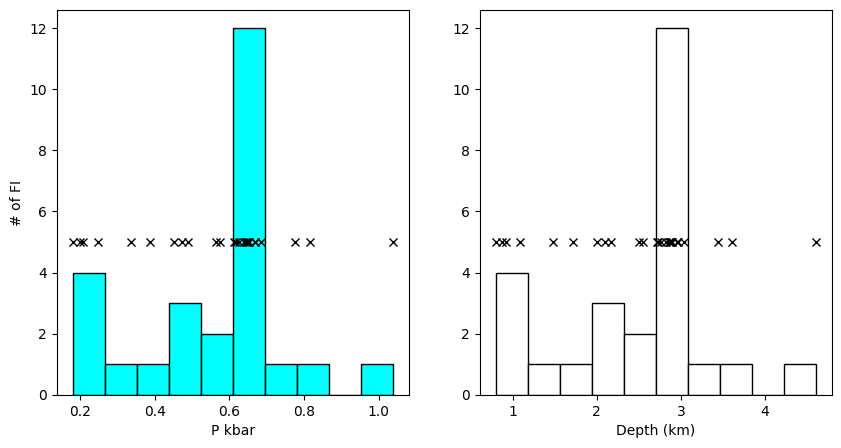

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step3b_Secondary_Peaks is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()